In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [186]:
car_data = pd.read_csv("CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [187]:
car_data.shape

(205, 26)

In [188]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [189]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [190]:
#Splitting company name from CarName column
CompanyName = car_data['CarName'].apply(lambda x : x.split(' ')[0])
car_data.insert(3,"CompanyName",CompanyName)
car_data.drop(['CarName'],axis=1,inplace=True)
car_data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [191]:
car_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [192]:
car_data['CompanyName'] = car_data['CompanyName'].str.lower()

def replace_name(a, b):
    car_data['CompanyName'] = car_data['CompanyName'].replace(a, b)

replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

car_data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [193]:
car_data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [194]:
car_data = car_data.drop("car_ID", axis = 1)

In [195]:
numerical_car_data = car_data.select_dtypes(include=["int64", "float64"])
categorical_car_data = car_data.select_dtypes(include="object")
print(numerical_car_data)
print(categorical_car_data)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68            

In [196]:
numerical_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


In [197]:
categorical_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CompanyName     205 non-null    object
 1   fueltype        205 non-null    object
 2   aspiration      205 non-null    object
 3   doornumber      205 non-null    object
 4   carbody         205 non-null    object
 5   drivewheel      205 non-null    object
 6   enginelocation  205 non-null    object
 7   enginetype      205 non-null    object
 8   cylindernumber  205 non-null    object
 9   fuelsystem      205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


## Correlation between the numerical features

In [198]:
price_correlation = numerical_car_data.corrwith(numerical_car_data["price"]).sort_values(ascending=False)
print(price_correlation)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
dtype: float64


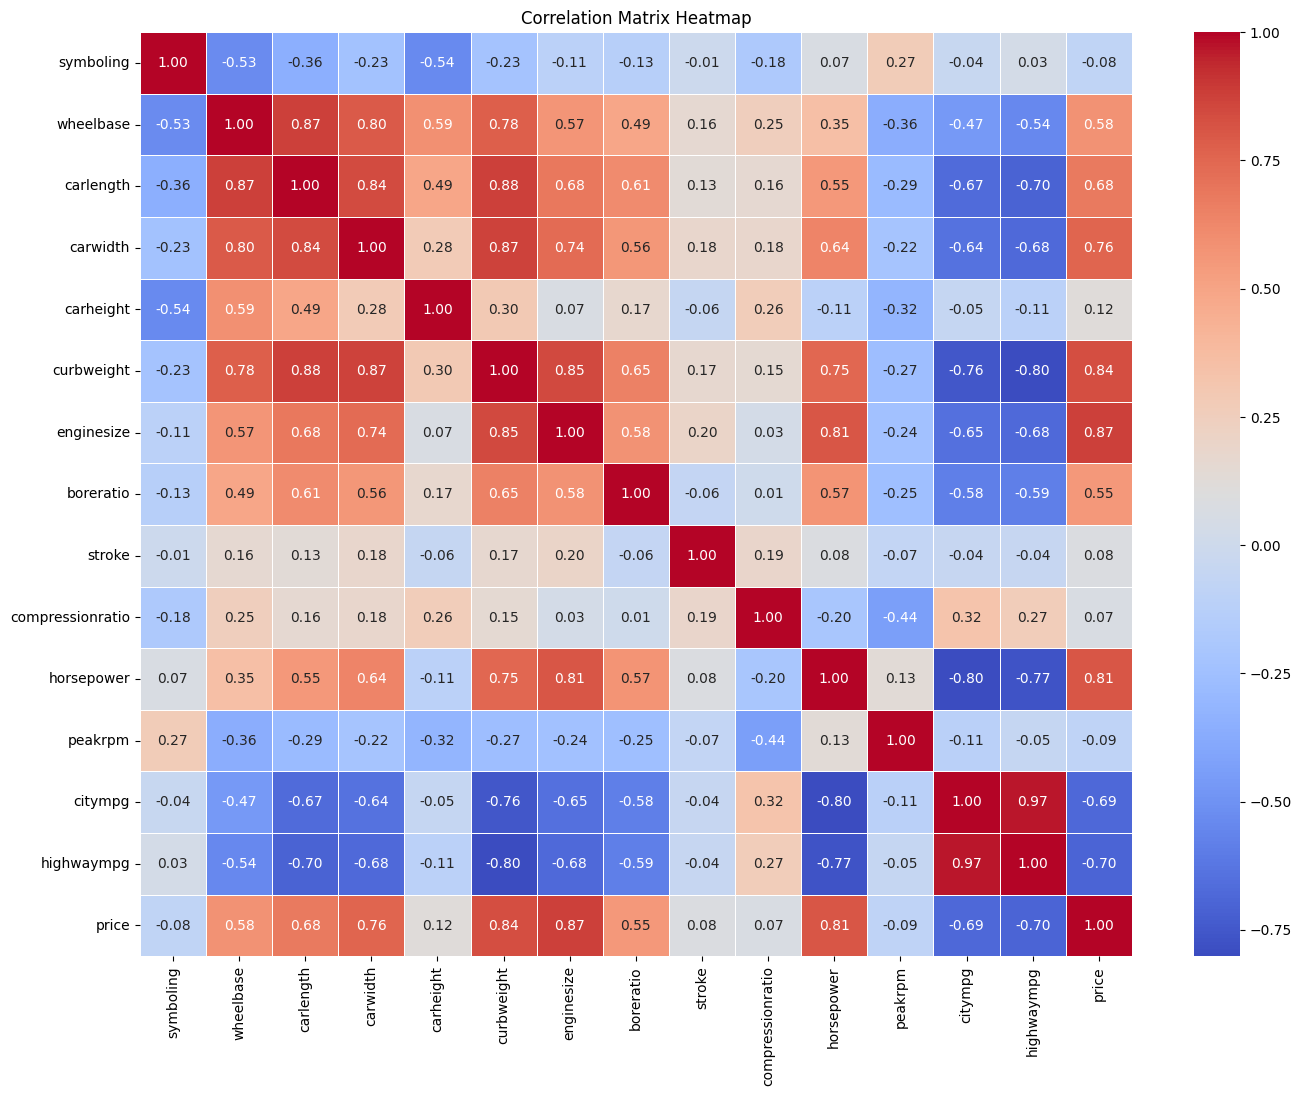

In [199]:
corr_mat = numerical_car_data.corr()

# Heatmap visualization
plt.figure(figsize=(16, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [200]:
# sns.pairplot(numerical_car_data)
# plt.show()

In [201]:
# Identify features with weak correlation (between -0.1 and 0.1)
low_corr_features = price_correlation[(price_correlation > -0.1) & (price_correlation < 0.1)].index

# Drop those features
car_data = car_data.drop(low_corr_features, axis=1)
numerical_car_data = numerical_car_data.drop(low_corr_features, axis=1)

In [202]:
numerical_car_data.corrwith(numerical_car_data["price"]).sort_values(ascending=False)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
carheight     0.119336
citympg      -0.685751
highwaympg   -0.697599
dtype: float64

In [203]:
# sns.pairplot(numerical_car_data)
# plt.show()

In [204]:
car_data.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


In [205]:
categorical_car_data.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [206]:
categorical_car_data["price"] = car_data["price"]
categorical_car_data.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


## Company name categorical data

CompanyName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: count, dtype: int64


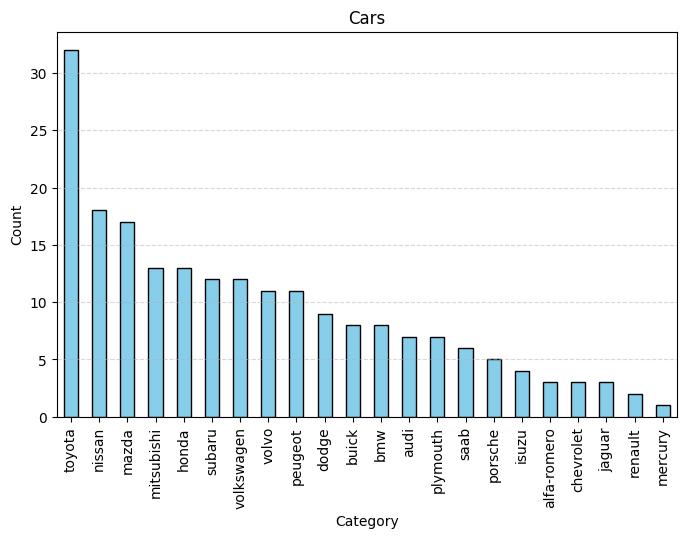

In [207]:
company_counts = categorical_car_data["CompanyName"].value_counts()
print(company_counts)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
company_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cars')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [208]:
categorical_car_data["CompanyNameEncoded"] = categorical_car_data["CompanyName"].map(company_counts)
categorical_car_data.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price,CompanyNameEncoded
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0,3
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0,3
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0,3
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0,7
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0,7


### Frequency Encoding of Car Brand

The **Car Brand** column in the dataset was encoded using **frequency encoding**. This technique involves replacing each brand name with the frequency of its occurrence in the dataset. The new **Frequency** column represents the count of how many times each brand appears in the dataset.

-0.3365111910816703


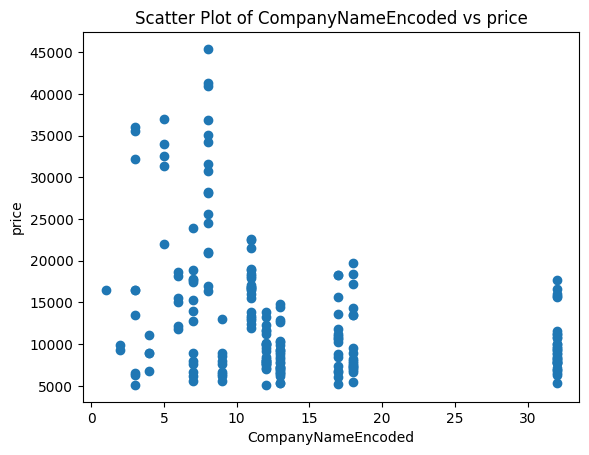

In [209]:
correlation_company_name = categorical_car_data["CompanyNameEncoded"].corr(categorical_car_data["price"])
print(correlation_company_name)

# Scatter plot of Feature1 vs Feature2
plt.scatter(categorical_car_data['CompanyNameEncoded'], categorical_car_data['price'])

# Adding labels to the plot
plt.xlabel('CompanyNameEncoded')
plt.ylabel('price')
plt.title('Scatter Plot of CompanyNameEncoded vs price')

# Show the plot
plt.show()

## Target Encoding

In [210]:
avg_price_car_brand = categorical_car_data.groupby("CompanyName")['price'].mean().reset_index()
categorical_car_data = categorical_car_data.merge(avg_price_car_brand, on='CompanyName', how='left', suffixes=('', '_avg'))
categorical_car_data.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price,CompanyNameEncoded,price_avg
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0,3,15498.333333
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0,3,15498.333333
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0,3,15498.333333
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0,7,17859.166714
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0,7,17859.166714


In [211]:
correlation_price_avg = categorical_car_data["price_avg"].corr(categorical_car_data["price"])
print(correlation_price_avg)

0.8955202685373757


In [212]:
car_data['price_avg'] = categorical_car_data['price_avg']
car_data = car_data.drop('CompanyName', axis=1)
categorical_car_data = categorical_car_data.drop('CompanyName', axis=1)
car_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,price_avg
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,mpfi,3.47,111,21,27,13495.0,15498.333333
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,mpfi,3.47,111,21,27,16500.0,15498.333333
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,15498.333333
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,mpfi,3.19,102,24,30,13950.0,17859.166714
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,mpfi,3.19,115,18,22,17450.0,17859.166714


## Analysis of fuel data

In [213]:
print(categorical_car_data['fueltype'].value_counts())

fueltype
gas       185
diesel     20
Name: count, dtype: int64


As there are not many categories, only two, one hot encoding is used

In [214]:
fuletype_encoding = pd.get_dummies(categorical_car_data['fueltype'], prefix='fuel')
categorical_car_data = pd.concat([categorical_car_data.drop('fueltype', axis=1), fuletype_encoding], axis=1)
car_data = pd.concat([car_data.drop('fueltype', axis=1), fuletype_encoding], axis=1)
car_data.head()

,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,price_avg,fuel_diesel,fuel_gas
0,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,111,21,27,13495.0,15498.333333,False,True
1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,111,21,27,16500.0,15498.333333,False,True
2,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,154,19,26,16500.0,15498.333333,False,True
3,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,102,24,30,13950.0,17859.166714,False,True
4,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,115,18,22,17450.0,17859.166714,False,True


## Encoding fuel system

In [215]:
print(categorical_car_data['fuelsystem'].value_counts())

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


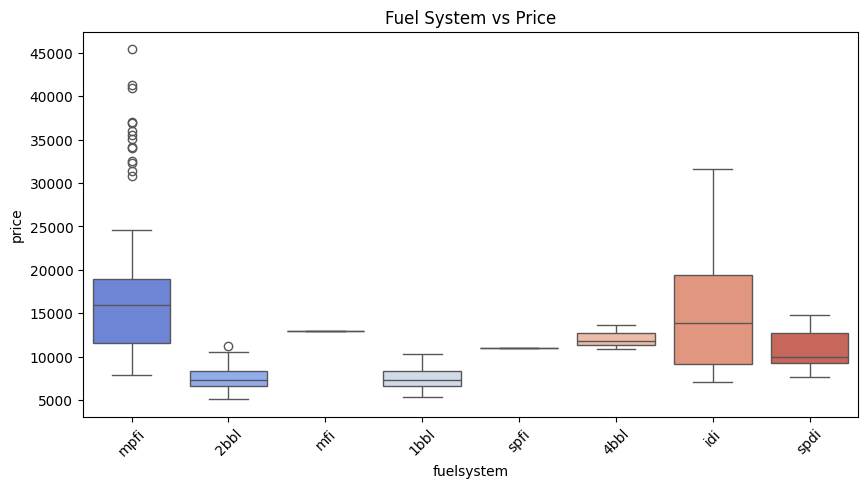

In [216]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    x='fuelsystem', 
    y='price', 
    data=categorical_car_data, 
    hue='fuelsystem',   # Assign x-variable to hue
    legend=False,       # Disable legend (since hue is same as x)
    palette='coolwarm'  # Keep color styling
)

plt.xticks(rotation=45)
plt.title("Fuel System vs Price")
plt.show()

In [217]:
print(categorical_car_data.groupby('fuelsystem')['price'].mean().sort_values(ascending=False))

fuelsystem
mpfi    17754.602840
idi     15838.150000
mfi     12964.000000
4bbl    12145.000000
spfi    11048.000000
spdi    10990.444444
1bbl     7555.545455
2bbl     7478.151515
Name: price, dtype: float64


In [218]:
fuelsystem_encoding = pd.get_dummies(categorical_car_data['fuelsystem'], prefix='fuelsystem')
categorical_car_data = pd.concat([categorical_car_data.drop('fuelsystem', axis=1), fuelsystem_encoding], axis=1)
car_data = pd.concat([car_data.drop('fuelsystem', axis=1), fuelsystem_encoding], axis=1)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aspiration       205 non-null    object 
 1   doornumber       205 non-null    object 
 2   carbody          205 non-null    object 
 3   drivewheel       205 non-null    object 
 4   enginelocation   205 non-null    object 
 5   wheelbase        205 non-null    float64
 6   carlength        205 non-null    float64
 7   carwidth         205 non-null    float64
 8   carheight        205 non-null    float64
 9   curbweight       205 non-null    int64  
 10  enginetype       205 non-null    object 
 11  cylindernumber   205 non-null    object 
 12  enginesize       205 non-null    int64  
 13  boreratio        205 non-null    float64
 14  horsepower       205 non-null    int64  
 15  citympg          205 non-null    int64  
 16  highwaympg       205 non-null    int64  
 17  price           

## Analysing Engine type

In [219]:
print(car_data['enginetype'].value_counts())

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


In [220]:
enginetype_encoding = pd.get_dummies(categorical_car_data['enginetype'], prefix='enginetype')
categorical_car_data = pd.concat([categorical_car_data.drop('enginetype', axis=1), enginetype_encoding], axis=1)
car_data = pd.concat([car_data.drop('enginetype', axis=1), enginetype_encoding], axis=1)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   aspiration        205 non-null    object 
 1   doornumber        205 non-null    object 
 2   carbody           205 non-null    object 
 3   drivewheel        205 non-null    object 
 4   enginelocation    205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  cylindernumber    205 non-null    object 
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  horsepower        205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
 1

## Door number

In [221]:
# Door number is not that important for price prediction
car_data = car_data.drop('doornumber', axis=1)
categorical_car_data = categorical_car_data.drop('doornumber', axis=1)

## Engine location

In [222]:
car_data = car_data.drop('enginelocation', axis=1)
categorical_car_data = categorical_car_data.drop('enginelocation', axis=1)
categorical_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aspiration          205 non-null    object 
 1   carbody             205 non-null    object 
 2   drivewheel          205 non-null    object 
 3   cylindernumber      205 non-null    object 
 4   price               205 non-null    float64
 5   CompanyNameEncoded  205 non-null    int64  
 6   price_avg           205 non-null    float64
 7   fuel_diesel         205 non-null    bool   
 8   fuel_gas            205 non-null    bool   
 9   fuelsystem_1bbl     205 non-null    bool   
 10  fuelsystem_2bbl     205 non-null    bool   
 11  fuelsystem_4bbl     205 non-null    bool   
 12  fuelsystem_idi      205 non-null    bool   
 13  fuelsystem_mfi      205 non-null    bool   
 14  fuelsystem_mpfi     205 non-null    bool   
 15  fuelsystem_spdi     205 non-null    bool   
 16  fuelsyst

## Aspiration analysis

In [223]:
print(categorical_car_data['aspiration'].value_counts())

aspiration
std      168
turbo     37
Name: count, dtype: int64


In [224]:
aspiration_encoding = pd.get_dummies(categorical_car_data['aspiration'])
categorical_car_data = pd.concat([categorical_car_data.drop('aspiration', axis=1), aspiration_encoding], axis=1)
car_data = pd.concat([car_data.drop('aspiration', axis=1), aspiration_encoding], axis=1)
categorical_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbody             205 non-null    object 
 1   drivewheel          205 non-null    object 
 2   cylindernumber      205 non-null    object 
 3   price               205 non-null    float64
 4   CompanyNameEncoded  205 non-null    int64  
 5   price_avg           205 non-null    float64
 6   fuel_diesel         205 non-null    bool   
 7   fuel_gas            205 non-null    bool   
 8   fuelsystem_1bbl     205 non-null    bool   
 9   fuelsystem_2bbl     205 non-null    bool   
 10  fuelsystem_4bbl     205 non-null    bool   
 11  fuelsystem_idi      205 non-null    bool   
 12  fuelsystem_mfi      205 non-null    bool   
 13  fuelsystem_mpfi     205 non-null    bool   
 14  fuelsystem_spdi     205 non-null    bool   
 15  fuelsystem_spfi     205 non-null    bool   
 16  enginety

In [225]:
car_data = pd.get_dummies(car_data, columns=['carbody', 'drivewheel', 'cylindernumber'])
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   enginesize             205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   horsepower             205 non-null    int64  
 8   citympg                205 non-null    int64  
 9   highwaympg             205 non-null    int64  
 10  price                  205 non-null    float64
 11  price_avg              205 non-null    float64
 12  fuel_diesel            205 non-null    bool   
 13  fuel_gas               205 non-null    bool   
 14  fuelsystem_1bbl        205 non-null    bool   
 15  fuelsy

In [226]:
car_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,False,False,True,False,False,True,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,False,False,True,False,False,True,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,26,...,False,False,True,False,False,False,True,False,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,30,...,False,True,False,False,False,True,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,22,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,114,23,28,...,False,False,True,False,False,True,False,False,False,False
201,109.1,188.8,68.8,55.5,3049,141,3.78,160,19,25,...,False,False,True,False,False,True,False,False,False,False
202,109.1,188.8,68.9,55.5,3012,173,3.58,134,18,23,...,False,False,True,False,False,False,True,False,False,False
203,109.1,188.8,68.9,55.5,3217,145,3.01,106,26,27,...,False,False,True,False,False,False,True,False,False,False


## Training the model

In [227]:
x = car_data.drop('price', axis=1)
y = car_data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)

num_features = x.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

x_train[num_features] = scaler.fit_transform(x_train[num_features])
x_test[num_features] = scaler.transform(x_test[num_features])

print(f"Training Set: {x_train.shape}\nTesting Set: {x_test.shape}")

Training Set: (184, 45)
Testing Set: (21, 45)


In [228]:
price_predictor = Lasso(alpha=1.0)

price_predictor.fit(x_train, y_train)

Lasso()

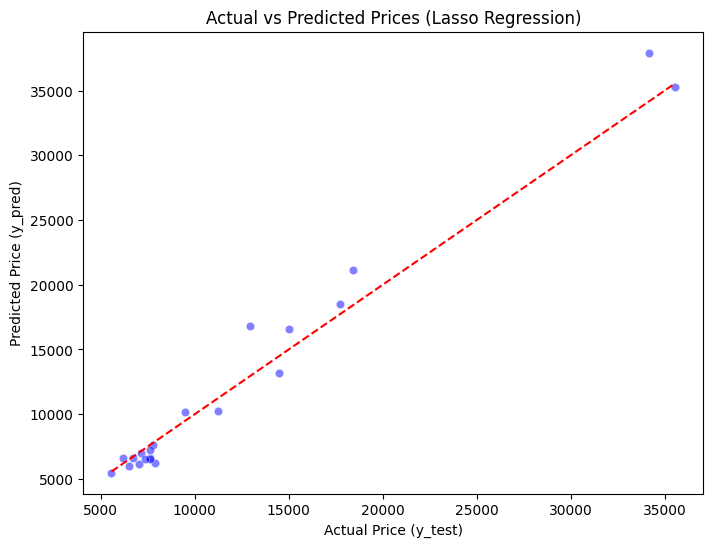

In [229]:
y_test_predict = price_predictor.predict(x_test)

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_predict, color='blue', alpha=0.5)

# Plot the ideal 1:1 line (Perfect Predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Price (y_pred)")
plt.title("Actual vs Predicted Prices (Lasso Regression)")
plt.show()

In [232]:
r2 = r2_score(y_test, y_test_predict)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9656


In [230]:
mse = mean_squared_error(y_test, y_test_predict)
rmse = mse ** 0.5  # Taking square root

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 2358204.52
Root Mean Squared Error (RMSE): 1535.64


## **Lasso Regression Model Analysis**

Our Lasso Regression model achieved an **R² score of 0.9656**, indicating a strong fit and high predictive power. Lasso’s built-in feature selection helps remove irrelevant predictors, improving interpretability. However, we should validate the model using **cross-validation** and **residual analysis** to check for overfitting. Tuning the **alpha** parameter may further enhance performance and generalization.